## 1. Exploratory data analysis

### High Level Exploratory Analysis

In [4]:
crime <- read.csv('crime_v2.csv')

In [5]:
str(crime)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [6]:
sapply(crime, class)

county      year    crmrte    prbarr   prbconv   prbpris    avgsen     polpc 
"integer" "integer" "numeric" "numeric"  "factor" "numeric" "numeric" "numeric" 
  density     taxpc      west   central     urban  pctmin80      wcon      wtuc 
"numeric" "numeric" "integer" "integer" "integer" "numeric" "numeric" "numeric" 
     wtrd      wfir      wser      wmfg      wfed      wsta      wloc       mix 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
  pctymle 
"numeric"

In [7]:
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

In [8]:
# 6 observations are empty
options(repr.matrix.max.rows=10,repr.matrix.max.cols=200)
crime[!complete.cases(crime), ]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [9]:
# Remove empty cases
clean <- crime[complete.cases(crime), ]

**Findings**

- Prbarr: at least one observation > 100 (not necessarily an error)
- Prbconv: One '\`', has wrong type (factor) - This is fixed when the empty cases are removed.
- Density is very low (max value is 8, while density in NC in 2016 was 208, [source](https://www.statista.com/statistics/304724/north-carolina-population-density/)) - It could be counties in rural areas.

### Follow up analysis (suspicious data)

**County**, there is one duplicated county, with the same values in all columns. We can delete one of the duplicates.

In [10]:
# One duplicated county (remove)
paste("Unique county identifier:", nrow(clean) == length(unique(clean$county)))
paste("Duplicated county id:", clean$county[duplicated(clean$county) & !is.na(clean$county)])
subset(clean, subset = clean$county == 193)
clean <- clean[!duplicated(clean$county), ]

[1] "Unique county identifier: FALSE"

[1] "Duplicated county id: 193"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,1,0,0,5.93109,285.8289,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,1,0,0,5.93109,285.8289,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


**Prbarr**, There is one value higher than 1. This is atypical but it could be possible if this probability is calculated as $\text{arrests_in_period_t} \ / \  \text{crimes_in_period_t}$, since a part of the arrests may come from crimes comitted before $t$.

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,1,0,0,1.28365,204.2206,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495


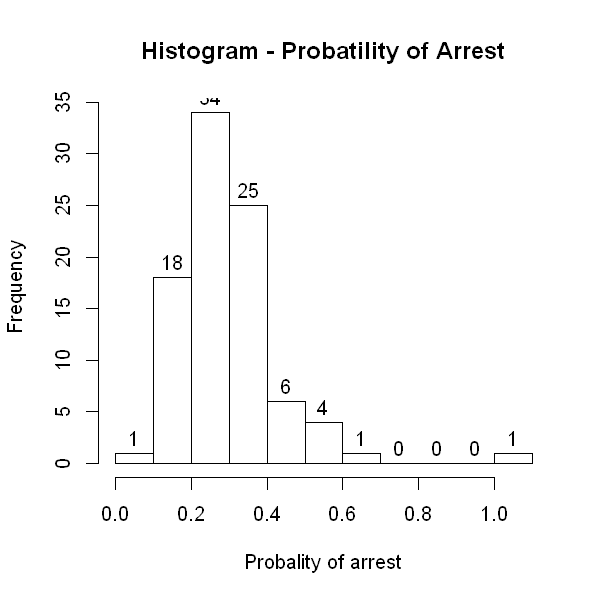

In [11]:
options(repr.plot.width=5, repr.plot.height=5)
hist(clean$prbarr, main = "Histogram - Probatility of Arrest", xlab = "Probality of arrest", labels = TRUE)
clean[clean$prbarr > 1, ]

**Prbconv**, this is importing as a class Factor vector, when it should be numeric. Cast as numeric.

In [12]:
# Remove ` and cast the class to numeric
clean$prbconv <- as.numeric(as.character(clean$prbconv))

In [13]:
summary(clean$prbconv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34422 0.45170 0.55086 0.58513 2.12121 

Crime rate

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020604 0.030002 0.033510 0.040249 0.098966 

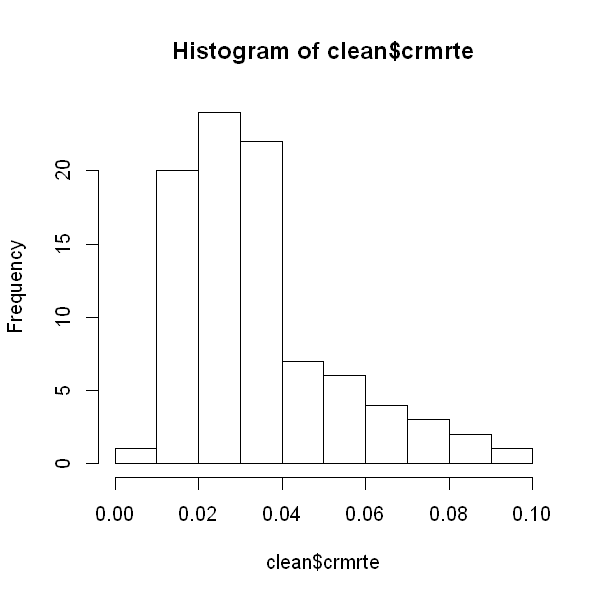

In [14]:
summary(clean$crmrte)
hist(clean$crmrte)

In [15]:
freqs.crmrte <- data.frame(table(clean$crmrte))
length(freqs.crmrte$Freq[freqs.crmrte$Freq > 1])    # No repeated values

[1] 0

### Quick clean

In [16]:
crime <- read.csv('crime_v2.csv')
clean <- crime[complete.cases(crime),]
clean <- clean[!duplicated(clean),]
clean$prbconv <- as.numeric(as.character(clean$prbconv))

### Distribution of variables

In [17]:
library(car, warn.conflicts = FALSE)

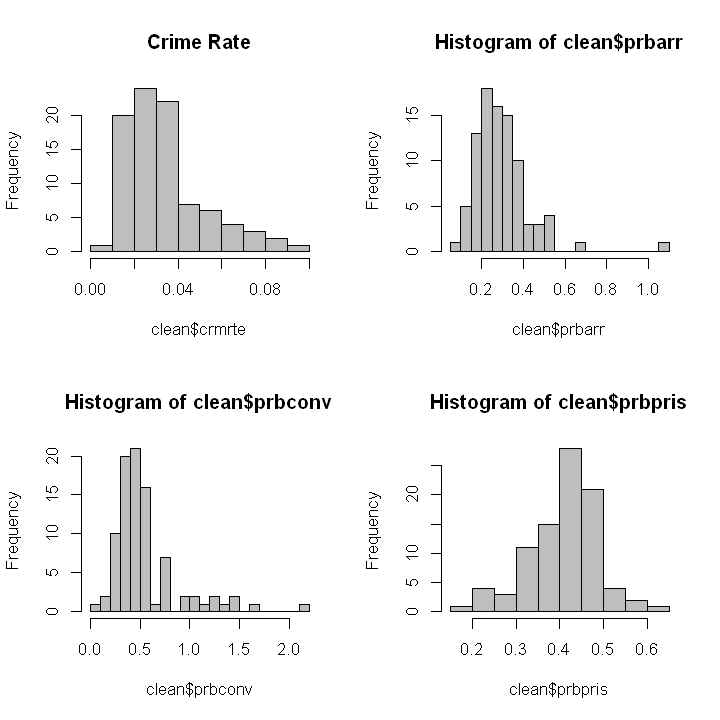

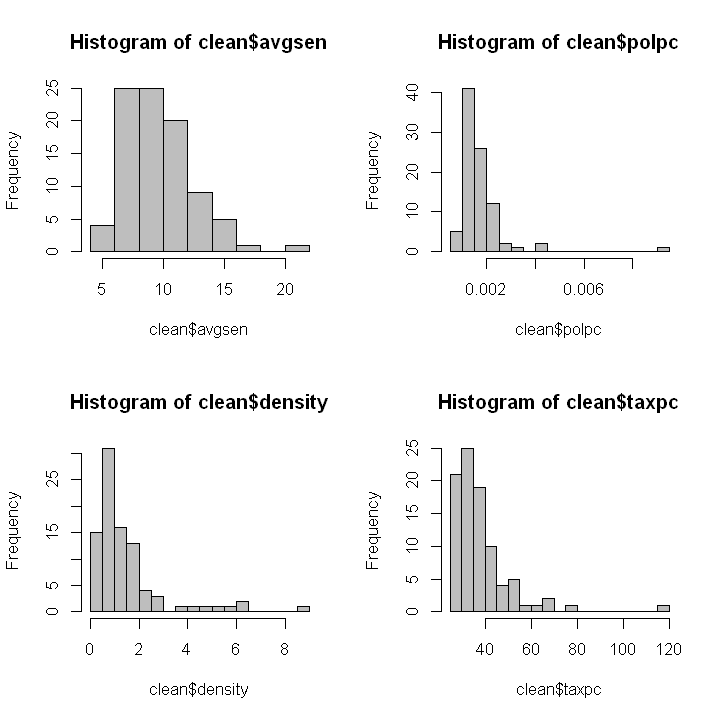

In [72]:
options(repr.plot.width=6, repr.plot.height=6)
par(mfrow = c(2, 2))
hist(clean$crmrte, breaks="FD", col="grey", main = 'Crime Rate')
hist(clean$prbarr, breaks="FD", col="grey")
hist(clean$prbconv, breaks="FD", col="grey")
hist(clean$prbpris, breaks="FD", col="grey")
par(mfrow = c(2, 2))
hist(clean$avgsen, breaks="FD", col="grey")
hist(clean$polpc, breaks="FD", col="grey")
hist(clean$density, breaks="FD", col="grey")
   ###  The distribution is almost certainly too low by two orders of magnitude
hist(clean$taxpc, breaks="FD", col="grey")

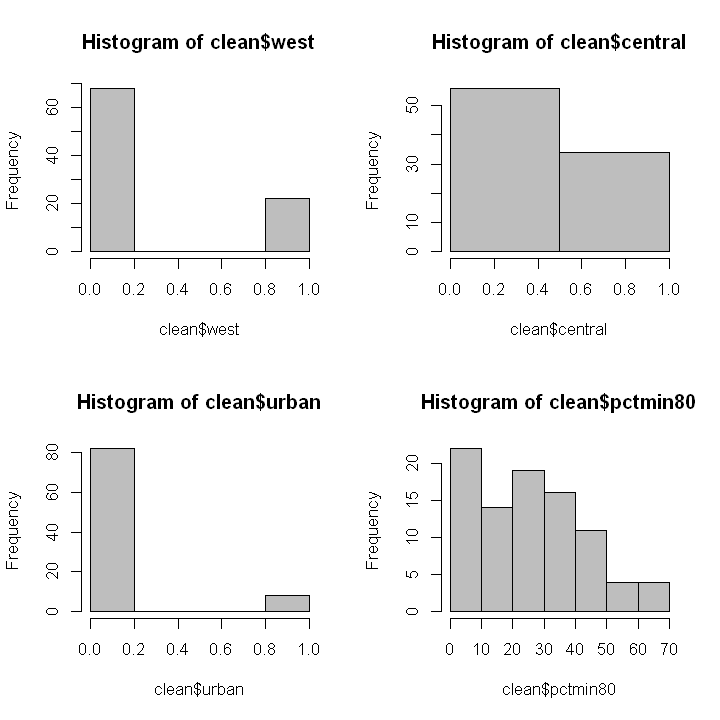

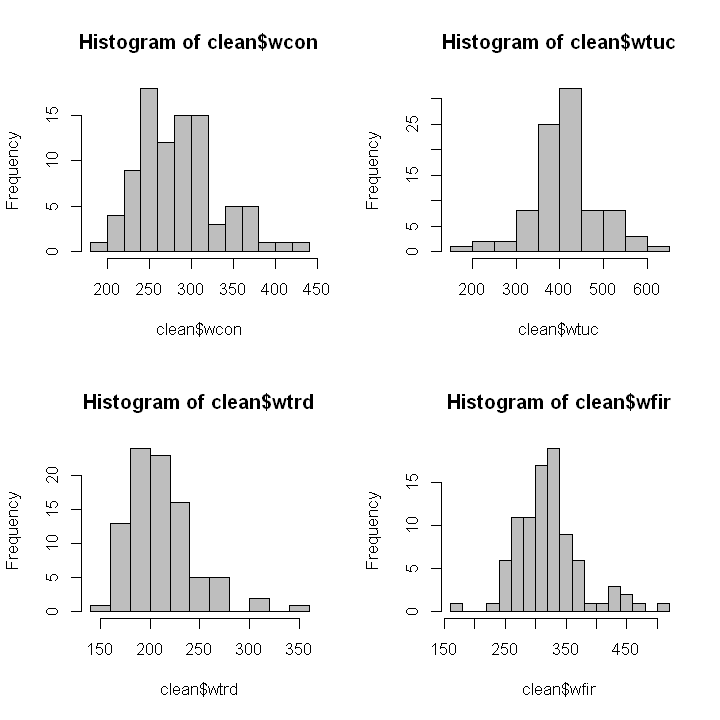

In [73]:
par(mfrow = c(2, 2))
hist(clean$west, breaks="FD", col="grey")
hist(clean$central, breaks="FD", col="grey")
hist(clean$urban, breaks="FD", col="grey")
hist(clean$pctmin80, breaks="FD", col="grey")
par(mfrow = c(2, 2))
hist(clean$wcon, breaks="FD", col="grey")
hist(clean$wtuc, breaks="FD", col="grey")
hist(clean$wtrd, breaks="FD", col="grey")
hist(clean$wfir, breaks="FD", col="grey")

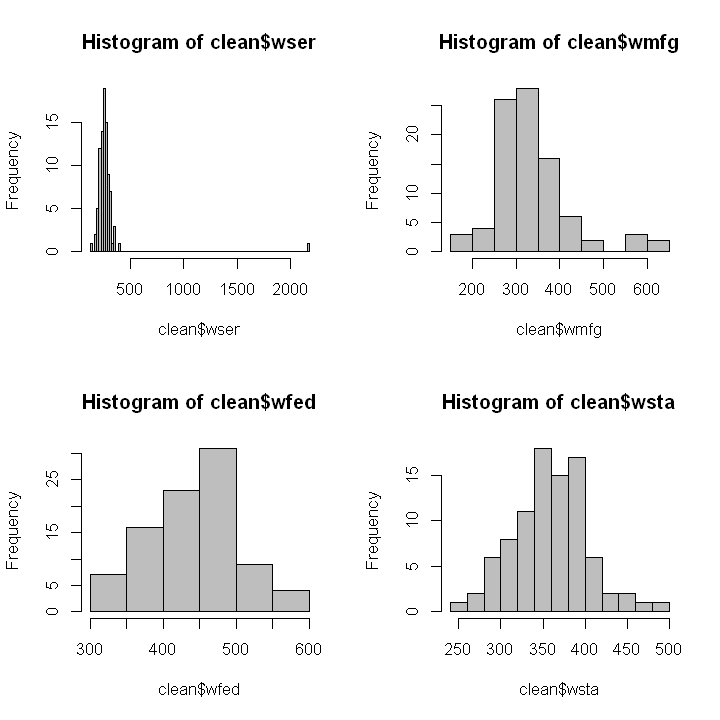

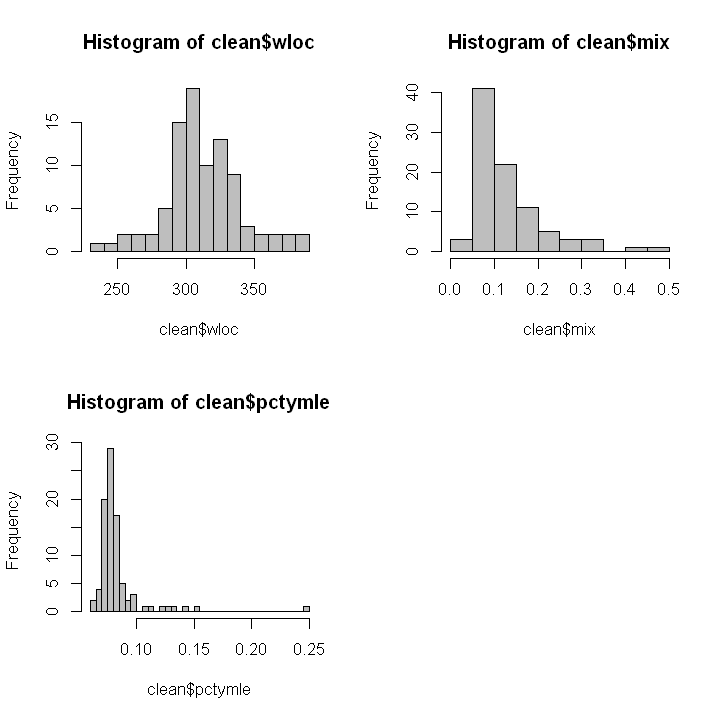

In [74]:
par(mfrow = c(2, 2))
hist(clean$wser, breaks="FD", col="grey")
#    ### Extreme outlier in service (>$2000/week)
hist(clean$wmfg, breaks="FD", col="grey")
hist(clean$wfed, breaks="FD", col="grey")
hist(clean$wsta, breaks="FD", col="grey")
par(mfrow = c(2, 2))
hist(clean$wloc, breaks="FD", col="grey")
hist(clean$mix, breaks="FD", col="grey")
hist(clean$pctymle, breaks="FD", col="grey")

### Multivariate analysis

#### Scatterplot matrices

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"

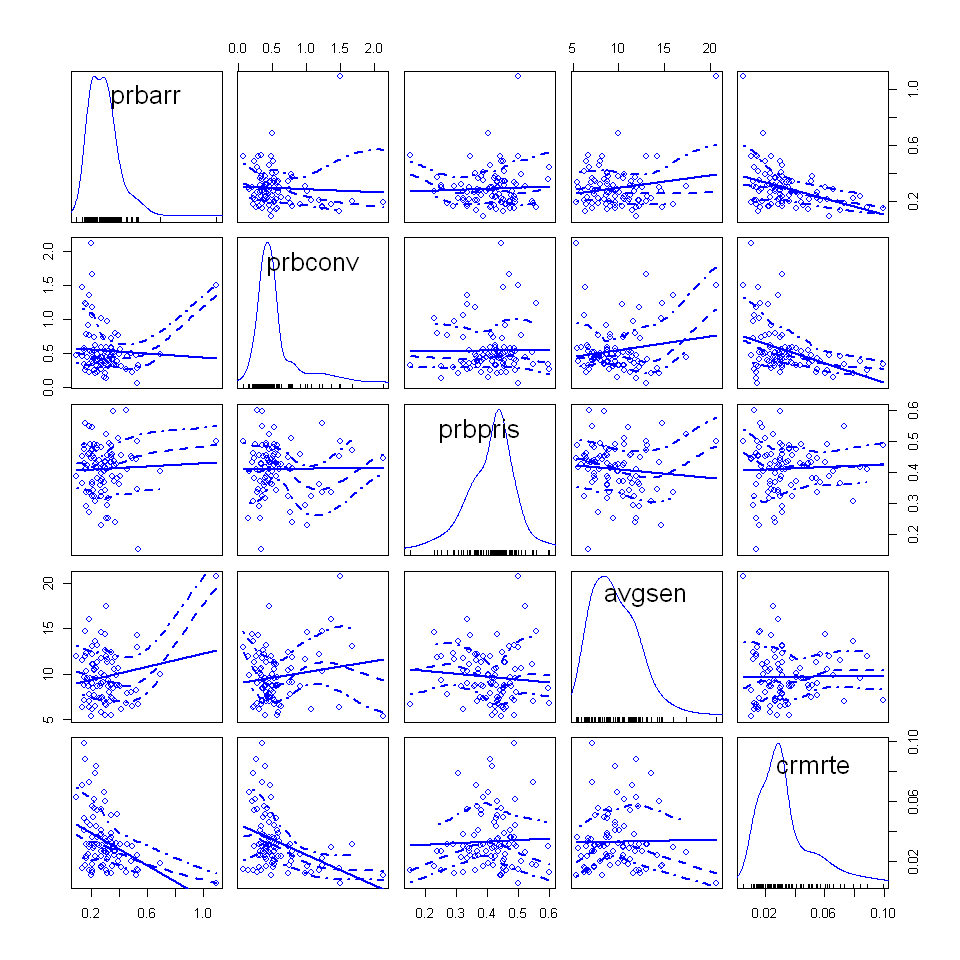

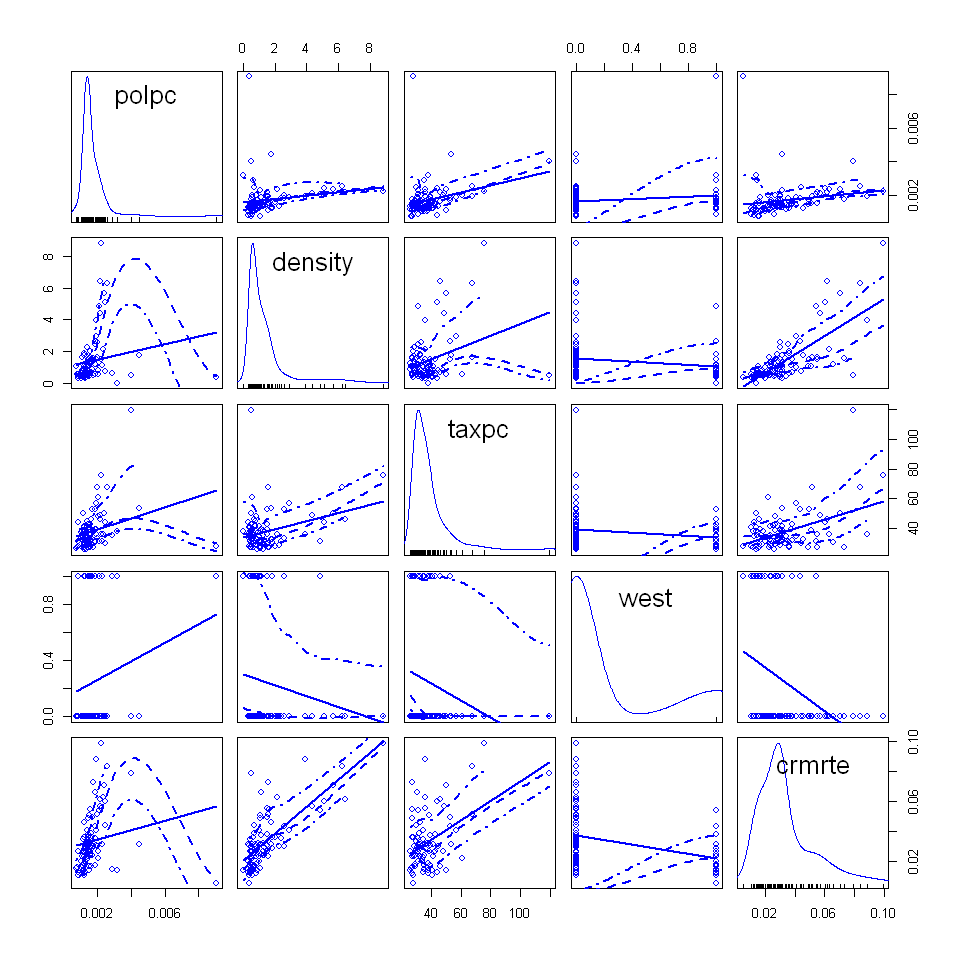

In [66]:
options(repr.plot.width=8, repr.plot.height=8)
scatterplotMatrix(clean[,c(4:7, 3)])
scatterplotMatrix(clean[,c(8:11, 3)])

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"

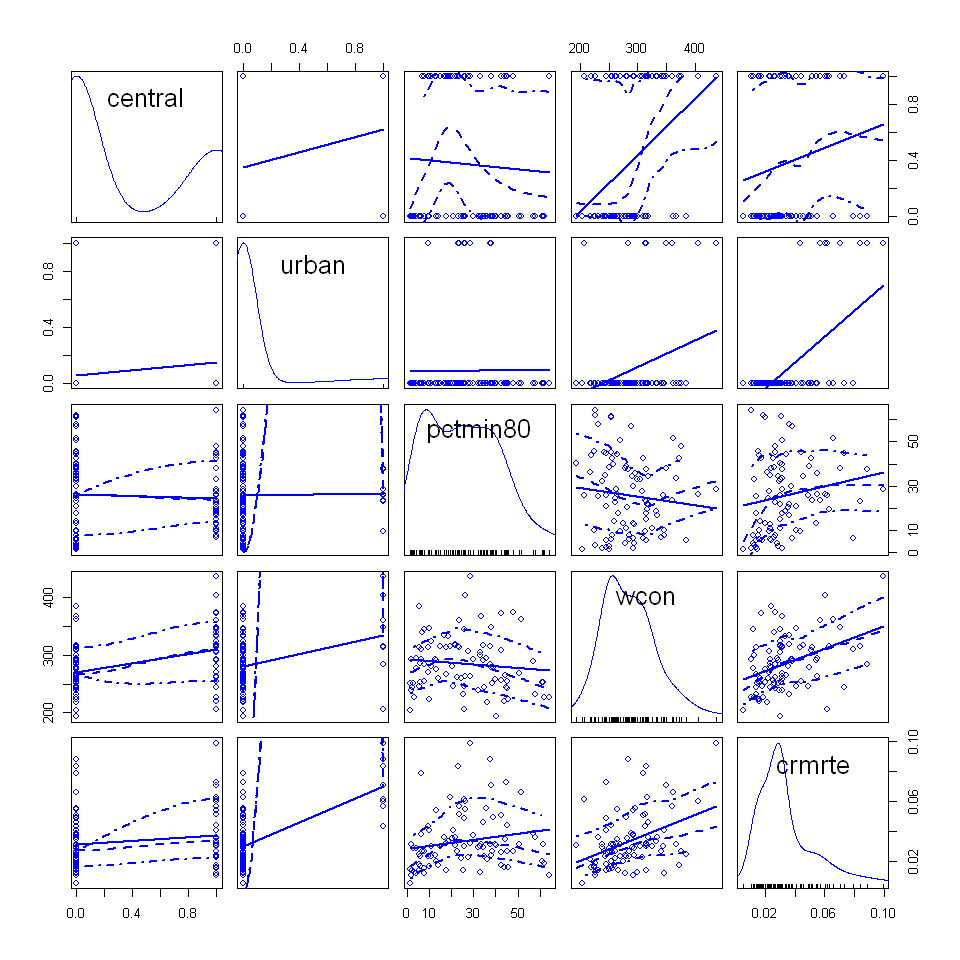

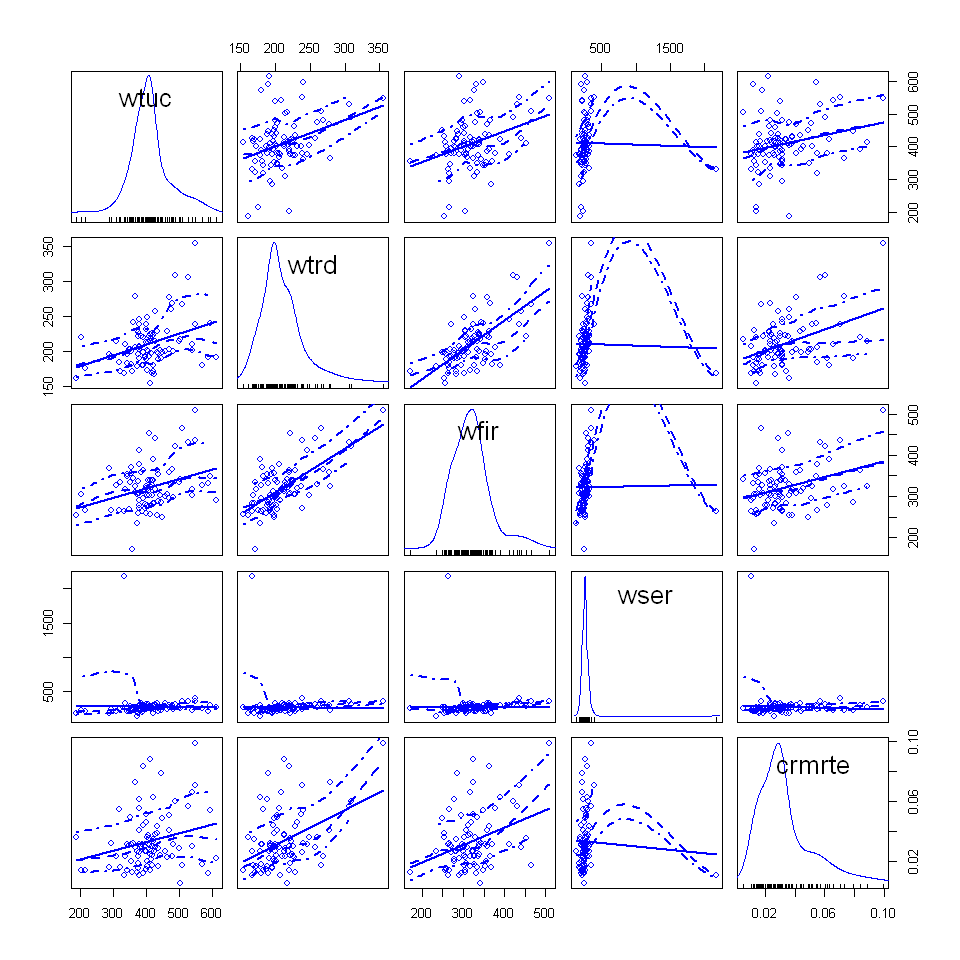

In [67]:
scatterplotMatrix(clean[,c(12:15, 3)])
scatterplotMatrix(clean[,c(16:19, 3)])

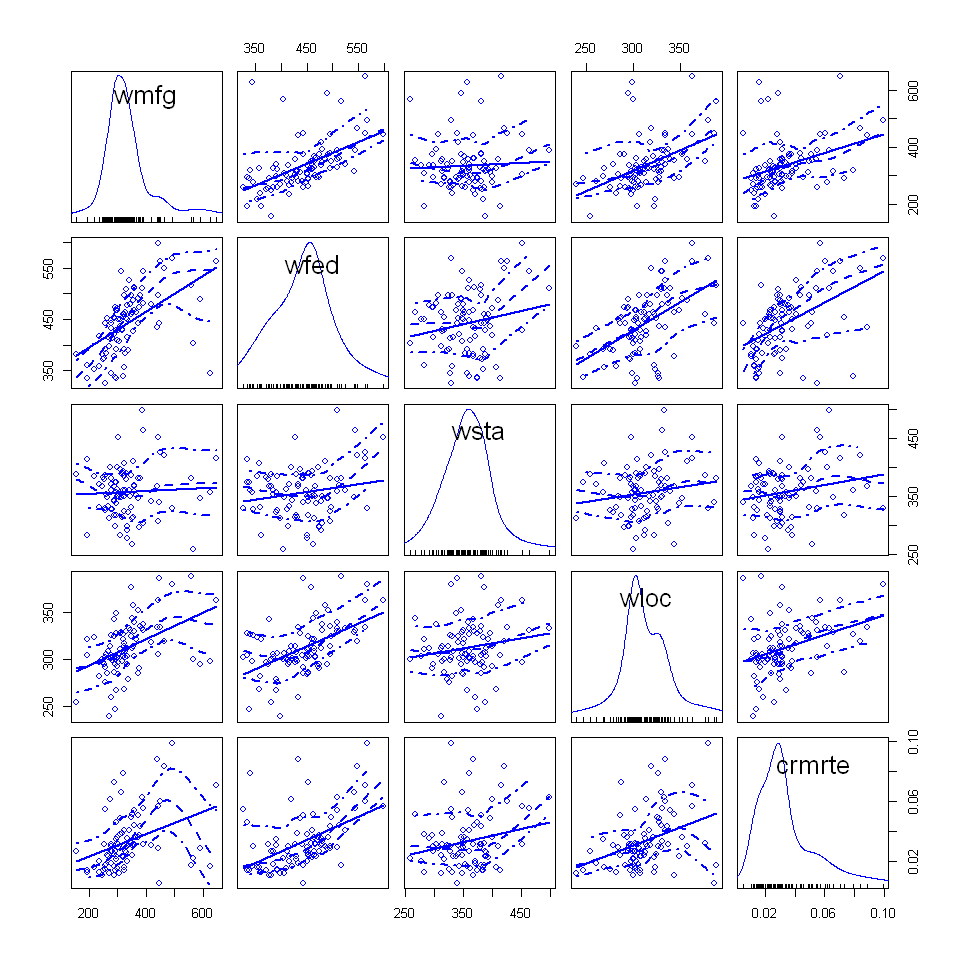

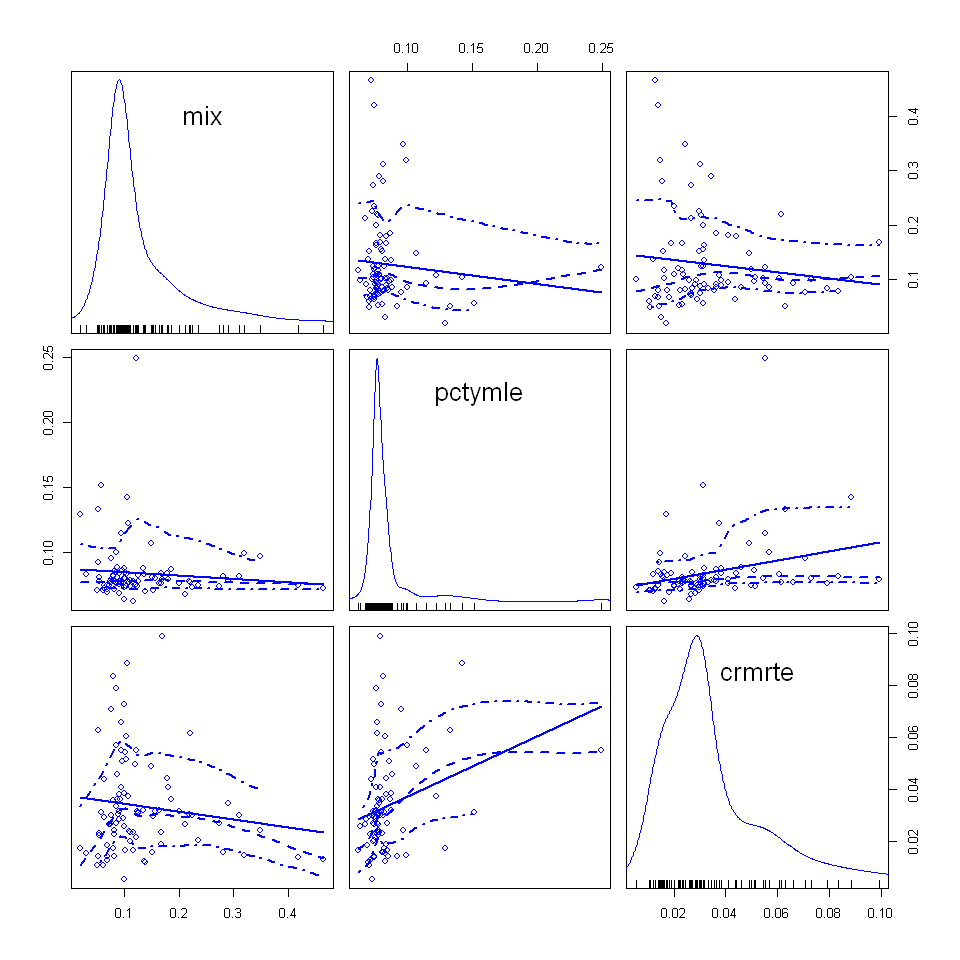

In [68]:
scatterplotMatrix(clean[,c(20:23, 3)])
scatterplotMatrix(clean[,c(24:25, 3)])

#### Correlations (all)

In [81]:
library(dplyr)
library(corrplot)

In [167]:
# Add transformed variables
clean$prbconv.inv <- 1/clean$prbconv
clean$crmrte.log <- log(clean$crmrte)

# Compute correlations
crime.corrs <- cor(select(clean, -matches('year')))
crime.corrs

,county,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,prbconv.inv,crmrte.log
county,1.00000000,0.02079069,-0.01589221,0.13961646,-0.07652053,0.03477234,0.07767489,-0.02480667,-0.06366881,0.006598442,-0.01912746,-0.06113352,0.06231839,0.04362617,0.01499626,-0.01626404,0.02511189,0.13979302,-0.04062009,-0.01631922,0.11637725,0.05686582,-0.06103073,0.10157951,-0.1925907,0.02376789
crmrte,0.02079069,1.00000000,-0.39528302,-0.38596559,0.04799540,0.01979653,0.16728163,0.72837061,0.44871511,-0.345551479,0.16588031,0.61506307,0.18165059,0.39296155,0.23599574,0.42722262,0.33602609,-0.05206996,0.35256117,0.48991633,0.19984675,0.35982934,-0.13200035,0.29033966,0.1784277,0.94154646
prbarr,-0.01589221,-0.39528302,1.00000000,-0.05579621,0.04583324,0.17869425,0.42596480,-0.30270285,-0.13719105,0.173703494,-0.16888612,-0.20856276,0.04907002,-0.25183650,-0.07035781,-0.09948428,-0.17253501,-0.13133303,-0.15316974,-0.20792619,-0.16253921,-0.02447781,0.41289804,-0.18096201,0.1496800,-0.47276691
prbconv,0.13961646,-0.38596559,-0.05579621,1.00000000,0.01102265,0.15585232,0.17186514,-0.22666583,-0.12738963,0.047262215,-0.04640007,-0.19709186,0.06249824,-0.11745576,-0.00716159,-0.13454762,0.03217747,0.45666832,0.01757978,-0.06085923,-0.12843449,0.05060549,-0.30425125,-0.16222602,-0.6117615,-0.44681361
prbpris,-0.07652053,0.04799540,0.04583324,0.01102265,1.00000000,-0.09468083,0.04820783,0.07736654,-0.09236051,-0.044625404,0.16452011,0.05035412,0.10613609,-0.05961122,0.12473024,0.13933869,0.03277797,0.03801107,0.00940876,0.08496507,-0.03121397,0.08119344,0.11658883,-0.08275975,0.0215790,0.02147024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wloc,0.05686582,0.3598293,-0.02447781,0.05060549,0.08119344,0.14575388,0.38698769,0.4598358,0.21990116,-0.11541424,0.33323127,0.33835635,-0.10590108,0.51704129,0.33301977,0.58146389,0.55443563,0.07697134,0.45045350,0.51941357,0.16464127,1.000000000,-0.25351938,-0.001651489,-0.1066633,0.2885668
mix,-0.06103073,-0.1320004,0.41289804,-0.30425125,0.11658883,-0.14170497,0.02411189,-0.1368944,-0.04355958,-0.00784116,-0.09210923,-0.06417238,0.20123542,-0.19587213,-0.25346871,-0.12575470,-0.21232339,-0.17356287,-0.34412513,-0.31220529,-0.07572603,-0.253519379,1.00000000,-0.092856608,0.3252907,-0.1247344
pctymle,0.10157951,0.2903397,-0.18096201,-0.16222602,-0.08275975,0.07099989,0.05022177,0.1152321,-0.09154375,-0.04077907,-0.10371067,0.09396449,-0.01925657,-0.02214779,-0.10249878,-0.10927702,0.01075555,-0.04310771,0.02417945,-0.06046727,0.21831622,-0.001651489,-0.09285661,1.000000000,0.1700039,0.2781547
prbconv.inv,-0.19259067,0.1784277,0.14967996,-0.61176151,0.02157900,0.08351870,0.09758598,0.1201844,0.16509974,0.10324091,-0.04968266,0.13475621,-0.14579741,0.02473594,-0.02281988,0.03195059,-0.12090618,-0.12919634,-0.12573167,-0.08259925,0.03186143,-0.106663299,0.32529073,0.170003873,1.0000000,0.1407724


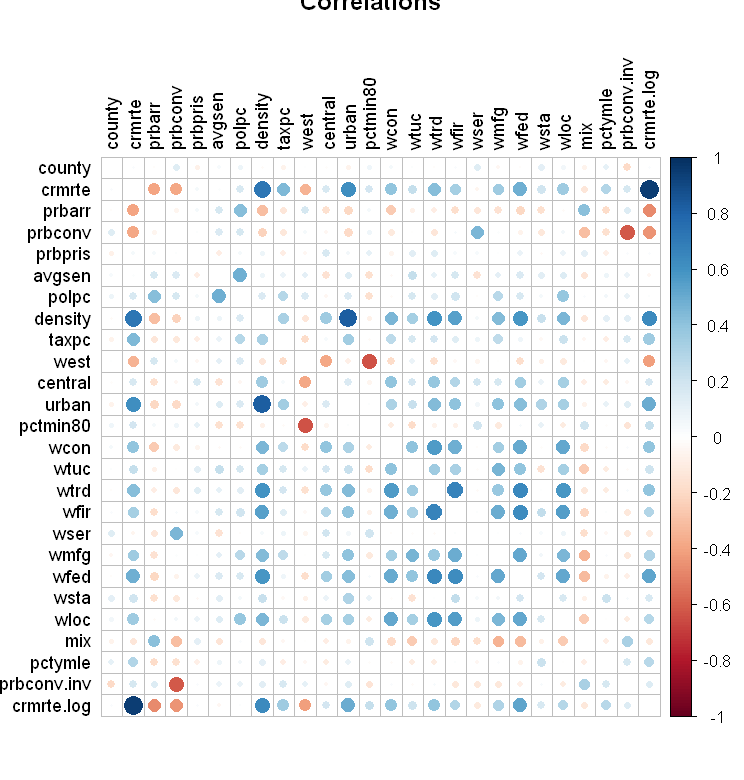

In [166]:
options(repr.plot.width=6.2, repr.plot.height=6.5)
corrplot(crime.corrs, method = 'circle',  order = 'original', diag = F,
         title = "Correlations", tl.col = 'black', tl.cex = 0.9, addCoefasPercent = T)


#### Correlations (confounding candidates)

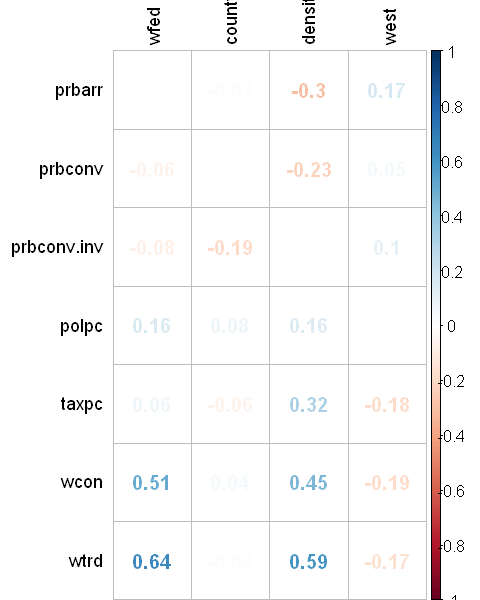

In [169]:
vars.interest <- c('prbarr', 'prbconv', 'prbconv.inv', 'polpc', 'taxpc', 'wcon', 'wtrd', 'wfed')
not.interest.corr.crmrte <- c('county', 'density', 'west', 'urban')
corrs.confounding <- cor(clean[, c(vars.interest, not.interest.corr.crmrte)])[1:7, 8:11]

options(repr.plot.width=4, repr.plot.height=5)
corrplot(corrs.confounding, method = c('number'),  order = 'original', diag = F,
         tl.col = 'black', tl.cex = 0.9,)

## 2. Regression analysis

From the criteria to select the model variables,

| Variable | Predicted | Correlated with crime (EDA) | Relevant for public policy | Confounding variable |
|----------|-----------|-----------------------------|----------------------------|----------------------|
| crmrte   | X         | -                           | -                          | -                    |
| prbarr   | -         | X                           | X                          | -                    |
| prbconv  | -         | X                           | X                          | -                    |
| polpc    | -         | X                           | X                          | -                    |
| density  | -         | X                           | -                          | X                    |
| taxpc    | -         | X                           | X                          | -                    |
| urban    | -         | X                           | -                          | X                    |
| wcon     | -         | X                           | X                          | -                    |
| wtrd     | -         | X                           | X                          | -                    |
| wfed     | -         | X                           | X                          | -                    |

### Model 1: explanatory variables of key interest

In [203]:
model1.1 <- lm(crmrte ~ prbarr + prbconv + polpc + taxpc + wcon + wtrd + wfed, data = clean)
model1.1$coefficients
paste("R-squared:", round(summary(model1.1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1.1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1.1), 0))

(Intercept)        prbarr       prbconv         polpc         taxpc 
-1.898568e-03 -6.469122e-02 -2.218987e-02  6.345658e+00  2.944639e-04 
         wcon          wtrd          wfed 
 3.452378e-06  4.847801e-05  7.556352e-05

[1] "R-squared: 0.65"

[1] "Adjusted R-squared: 0.62"

[1] "Akaike Information Criterion: -537"

Coefficients for wages are very low so may be irrelevant. They are also not correlated with the other predictors so are not confounding variables. I will change the specification to remove these.

In [192]:
model1.2 <- lm(crmrte ~ prbarr + prbconv + polpc + taxpc, data = clean)
model1.2$coefficients
paste("R-squared:", round(summary(model1.2)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1.2)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1.2), 0))

(Intercept)        prbarr       prbconv         polpc         taxpc 
 0.0465735251 -0.0805537787 -0.0251888454  8.5273338780  0.0002628334

[1] "R-squared: 0.57"

[1] "Adjusted R-squared: 0.55"

[1] "Akaike Information Criterion: -524"

Change prbcon to prbconv.inv

In [193]:
model1.3 <- lm(crmrte ~ prbarr + prbconv.inv + polpc, data = clean)
model1.3$coefficients
paste("R-squared:", round(summary(model1.3)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1.3)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1.3), 0))

(Intercept)       prbarr  prbconv.inv        polpc 
 0.038610386 -0.082343130  0.002471032  7.635285688

[1] "R-squared: 0.35"

[1] "Adjusted R-squared: 0.32"

[1] "Akaike Information Criterion: -488"

**Conclusion**: the model that explains better the variation of `crmrte` and has the lowest value of Akaike Information Criterion is model1.1

### Model 2: variables of interest + variables that increase accuracy

Started with model 1.1 and added the confounding variables + `west` (increases both R-squared and AIC)

In [225]:
model2.1 <- lm(crmrte ~ county + prbarr + prbconv + polpc + taxpc + wcon + wtrd + wfed + density + urban + west, data = clean)
model2.1$coefficients
paste("R-squared:", round(summary(model2.1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model2.1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model2.1), 0))

(Intercept)        county        prbarr       prbconv         polpc 
 2.921162e-02  2.013856e-05 -4.909198e-02 -1.880567e-02  5.854742e+00 
        taxpc          wcon          wtrd          wfed       density 
 1.421834e-04 -2.330545e-06 -2.355211e-05  3.000405e-05  4.281945e-03 
        urban          west 
 4.521572e-03 -1.021582e-02

[1] "R-squared: 0.78"

[1] "Adjusted R-squared: 0.74"

[1] "Akaike Information Criterion: -568"

### Model 3: variables of interest + variables that increase accuracy + All other variables

In [231]:
model3.1 <- lm(crmrte ~ prbarr + prbconv + polpc + taxpc + wcon + wtrd + wfed + density
               + urban + county + prbpris + avgsen + west + central + urban + pctmin80 
               + wtuc + wfir + wser + wmfg + wsta + wloc + mix + pctymle, data = clean)
model3.1$coefficients
paste("R-squared:", round(summary(model3.1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model3.1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model3.1), 0))

(Intercept)        prbarr       prbconv         polpc         taxpc 
 1.387843e-02 -5.124438e-02 -1.875579e-02  6.866910e+00  1.668505e-04 
         wcon          wtrd          wfed       density         urban 
 2.122118e-05  2.727472e-05  3.035557e-05  5.286634e-03  2.810815e-04 
       county       prbpris        avgsen          west       central 
 9.481247e-06  3.796801e-03 -3.930360e-04 -2.659785e-03 -4.193138e-03 
     pctmin80          wtuc          wfir          wser          wmfg 
 3.204771e-04  5.549961e-06 -3.491057e-05 -1.976440e-06 -8.559205e-06 
         wsta          wloc           mix       pctymle 
-2.450952e-05  1.465722e-05 -1.852478e-02  9.968414e-02

[1] "R-squared: 0.86"

[1] "Adjusted R-squared: 0.8"

[1] "Akaike Information Criterion: -584"

### Comparison of models

In [226]:
library(stargazer)

Warning message:
"package 'stargazer' was built under R version 3.4.4"
Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [234]:
stargazer(model1.1, model2.1, model3.1, type = "html", 
          report = "vc",
          title = "Linear Models Predicting Crime Rate",
          keep.stat = c("rsq", "n"),
          omit.table.layout = "n")


<table style="text-align:center"><caption><strong>Linear Models Predicting Crime Rate</strong></caption>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">crmrte</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">county</td><td></td><td>0.00002</td><td>0.00001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">prbpris</td><td></td><td></td><td>0.004</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">avgsen</td><td></td><td></td><td>-0.0004</td></tr>
<tr><td style="text-align:left"></td><td>

<table style="text-align:center"><caption><strong>Linear Models Predicting Crime Rate</strong></caption>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">crmrte</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">county</td><td></td><td>0.00002</td><td>0.00001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">prbpris</td><td></td><td></td><td>0.004</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">avgsen</td><td></td><td></td><td>-0.0004</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">prbarr</td><td>-0.065</td><td>-0.049</td><td>-0.051</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">prbconv</td><td>-0.022</td><td>-0.019</td><td>-0.019</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">polpc</td><td>6.346</td><td>5.855</td><td>6.867</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">taxpc</td><td>0.0003</td><td>0.0001</td><td>0.0002</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wcon</td><td>0.00000</td><td>-0.00000</td><td>0.00002</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wtrd</td><td>0.00005</td><td>-0.00002</td><td>0.00003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wfed</td><td>0.0001</td><td>0.00003</td><td>0.00003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">density</td><td></td><td>0.004</td><td>0.005</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">urban</td><td></td><td>0.005</td><td>0.0003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">west</td><td></td><td>-0.010</td><td>-0.003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">central</td><td></td><td></td><td>-0.004</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">pctmin80</td><td></td><td></td><td>0.0003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wtuc</td><td></td><td></td><td>0.00001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wfir</td><td></td><td></td><td>-0.00003</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wser</td><td></td><td></td><td>-0.00000</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wmfg</td><td></td><td></td><td>-0.00001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wsta</td><td></td><td></td><td>-0.00002</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wloc</td><td></td><td></td><td>0.00001</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">mix</td><td></td><td></td><td>-0.019</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">pctymle</td><td></td><td></td><td>0.100</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Constant</td><td>-0.002</td><td>0.029</td><td>0.014</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Observations</td><td>90</td><td>90</td><td>90</td></tr>
<tr><td style="text-align:left">R<sup>2</sup></td><td>0.653</td><td>0.775</td><td>0.855</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr></table>